# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy and Pyplot.

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [62]:
# def classical_gram_schmidt(A:np.ndarray) -> (np.ndarray,np.ndarray) : 
#     """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
#     Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.131"""
#     A = A.copy()
#     m, n = A.shape
#     Q = np.zeros((m, n))
#     R = np.zeros((n, n))
#     for k in range(n):
#         q = A[:, k]
#         j = 0
#         for j in range(k):
#             R[j,k] = Q[:,j].T @ A[:, k]
#             q = q - R[j,k] * Q[:,j]
#         R[k,k] = np.linalg.norm(q)
#         if R[k,k] != 0:
#             q = q/R[k,k]
#             Q[:,k] = q
#         else:
#             break
#     return Q, R

    
# def modified_gram_schmidt(A):
#     """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
#     Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.132"""
#     A = A.copy()
#     m, n = A.shape
#     Q = np.zeros((m, n))
#     R = np.zeros((n, n))
#     for k in range(n):
#         R[k,k] = np.linalg.norm(A[:,k])
#         if R[k,k] == 0:
#             break
#         Q[:,k] = A[:, k]/R[k,k]
#         # starting at 1, to adhere to condition in Heath
#         for j in range(k+1, n):
#             R[k,j] = Q[:,k].T @ A[:, j]
#             A[:, j] = A[:, j] - R[k,j]*Q[:,k]
#     return Q, R




In [63]:
def classical_gram_schmidt(A: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Perform QR decomposition of a matrix using the Classical Gram-Schmidt process.

    This function decomposes a given matrix A into an orthogonal matrix Q and an upper triangular matrix R such that A = QR.
    The method follows the algorithm specified in "Heath Scientific Computing: An Introductory Survey, 5th edition, p.131".

    Parameters:
    A (np.ndarray): A real or complex m x n matrix (where m >= n). The matrix to be decomposed.

    Returns:
    tuple: A tuple containing two numpy arrays, Q and R, where Q is an m x n orthogonal matrix and R is an n x n upper triangular matrix.

    Notes:
    - The input matrix A is copied to avoid modifying the original matrix.
    - This function does not handle degenerate cases where the matrix A does not have full rank.
    """
    # Copy the input matrix to avoid altering the original matrix
    A = A.copy()
    m, n = A.shape

    # Initialize matrices Q and R
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    # Iterate over the columns of A to construct Q and R
    for k in range(n):
        q = A[:, k]  # Start with the current column of A
        for j in range(k):
            # Compute the R elements as dot products
            R[j, k] = Q[:, j].T @ A[:, k]
            # Adjust q to be orthogonal to Q's columns
            q = q - R[j, k] * Q[:, j]
        
        # Normalize q to get an orthogonal vector
        R[k, k] = np.linalg.norm(q)
        if R[k, k] != 0:
            q = q / R[k, k]
            Q[:, k] = q
        else:
            # Break if a zero vector is encountered
            break

    return Q, R

In [64]:
def modified_gram_schmidt(A: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Perform QR decomposition of a matrix using the Modified Gram-Schmidt process.

    This function decomposes a given matrix A into an orthogonal matrix Q and an upper triangular matrix R such that A = QR.
    The modified algorithm offers improved numerical stability compared to the classical method.
    The method is specified in "Heath Scientific Computing: An Introductory Survey, 5th edition, p.132".

    Parameters:
    A (np.ndarray): A real or complex m x n matrix (where m >= n). The matrix to be decomposed.

    Returns:
    tuple: A tuple containing two numpy arrays, Q and R, where Q is an m x n orthogonal matrix and R is an n x n upper triangular matrix.

    Notes:
    - The input matrix A is copied to avoid modifying the original matrix.
    - The function does not handle degenerate cases where the matrix A does not have full rank.
    """
    # Copy the input matrix to avoid altering the original matrix
    A = A.copy()
    m, n = A.shape

    # Initialize matrices Q and R
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    # Iterate over the columns of A to construct Q and R
    for k in range(n):
        # Compute the norm of the k-th column of A
        R[k, k] = np.linalg.norm(A[:, k])
        if R[k, k] == 0:
            # Break if a zero vector is encountered
            break
        # Normalize the k-th column of A to form the k-th column of Q
        Q[:, k] = A[:, k] / R[k, k]

        # Orthogonalize the remaining columns of A against the k-th column of Q
        for j in range(k + 1, n):
            # Compute the R elements as dot products
            R[k, j] = Q[:, k].T @ A[:, j]
            # Adjust the j-th column of A to be orthogonal to the k-th column of Q
            A[:, j] = A[:, j] - R[k, j] * Q[:, k]

    return Q, R

In [65]:
   
# def modified_gram_schmidt(A):
#     """Returns QR decomposition of matrix A obtained by classic gram schmidt orgthonanlization procedure. 
#     Q and R are returned as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.132"""
#     A = A.copy()
#     m, n = A.shape
#     Q = np.zeros((m, n))
#     R = np.zeros((n, n))
#     for k in range(n):
#         R[k,k] = np.linalg.norm(A[:,k])
#         if R[k,k] == 0:
#             break
#         Q[:,k] = A[:, k]/R[k,k]
#         # starting at 1, to adhere to condition in Heath
#         for j in range(k+1, n):
#             R[k,j] = Q[:,k].T @ A[:, j]
#             A[:, j] = A[:, j] - R[k,j]*Q[:,k]
#     return Q, R

## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



In [66]:
def make_hilbert_matrix(n: int) -> np.ndarray:
    """Returns a Hilbert matrix sized n by n."""
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / ((i + 1) + (j + 1) - 1)
    return H

In [67]:
# Testing
H = make_hilbert_matrix(3)
print(H)

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [68]:
# Testing against reference numpy implementation
QR_reference = np.linalg.qr(H)[0]
QR_reference


array([[-0.85714286,  0.50160492,  0.11704115],
       [-0.42857143, -0.56848557, -0.70224688],
       [-0.28571429, -0.65208639,  0.70224688]])

In [69]:
QR_classic = classical_gram_schmidt(H)[0]
QR_classic

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

In [70]:
QR_modified = modified_gram_schmidt(H)[0]
QR_modified

array([[ 0.85714286, -0.50160492,  0.11704115],
       [ 0.42857143,  0.56848557, -0.70224688],
       [ 0.28571429,  0.65208639,  0.70224688]])

Reflecting on the tests, our implementation looks fine. The only difference is the signs, which is acceptable considering a Q obtained from a QR decomposition is unique up until the signs.

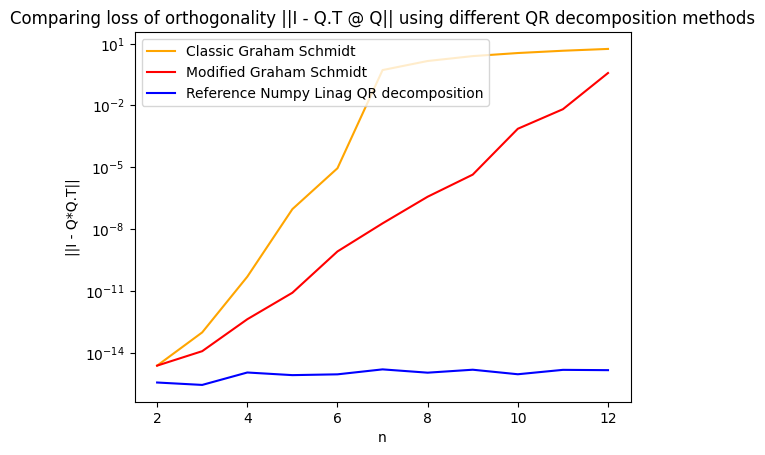

I_minus_Q_Qt_classic: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_modified: [2.368186647638997e-15, 1.19130603637318e-14, 4.220164732810544e-13, 8.129448492641487e-12, 8.213337219931363e-10, 1.8883321207316407e-08, 3.704655786928431e-07, 4.3746673643116425e-06, 0.0007342783123353194, 0.0065219743395960785, 0.37164390391767127]
I_minus_Q_Qt_reference: [3.597533769998862e-16, 2.7476618026966064e-16, 1.1004656964352382e-15, 8.200821523359857e-16, 8.961656023355713e-16, 1.559947614138878e-15, 1.0791513831031437e-15, 1.5011704008320562e-15, 9.04841642562989e-16, 1.4798365649911251e-15, 1.4289562855533472e-15]


In [71]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic]


# creating a list of Q matrices with our modified Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_modified = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_modified = modified_gram_schmidt(H)[0]
    list_of_Q_modified.append(Q_gram_modified)

# Computing ||I - Q.T @ Q|| for Gram Schmidt modified
I_minus_Q_Qt_modified = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_modified]

# creating a list of Q matrices with numpy reference QR decomposition based on Hilberts matrices with increasing n
list_of_Q_reference = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_reference = np.linalg.qr(H)[0]
    list_of_Q_reference.append(Q_gram_reference)

# Computing ||I - Q.T @ Q|| for reference numpy implementation
I_minus_Q_Qt_reference = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_reference]

# Plotting results
plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| using different QR decomposition methods')
plt.plot(n_range,I_minus_Q_Qt_classic, c = 'orange', label = 'Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_modified, c = 'red', label = 'Modified Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_reference, c = 'blue', label = 'Reference Numpy Linag QR decomposition')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic:',I_minus_Q_Qt_classic)
print('I_minus_Q_Qt_modified:', I_minus_Q_Qt_modified)
print('I_minus_Q_Qt_reference:', I_minus_Q_Qt_reference)


The observed loss of orthogonality is tiny for each method used.

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


In [72]:
# Do NOT delete YET

# n_range = range(2,13)

# # creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
# list_of_Q_classic_1 = []
# for n in n_range:
#     H = make_hilbert_matrix(n)
#     Q_gram_classic_1 = classical_gram_schmidt(H)[0]
#     list_of_Q_classic_1.append(Q_gram_classic_1)

# # Computing ||I - Q.T @ Q|| for Gram Schmidt classic
# I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_1]

# # creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
# list_of_Q_classic_2 = []
# for n in n_range:
#     H = make_hilbert_matrix(n)
#     Q_gram_classic_2 = classical_gram_schmidt(H)[0]
#     list_of_Q_classic_2.append(Q_gram_classic_2)

# # Computing ||I - Q.T @ Q|| for Gram Schmidt classic
# I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_2]

# plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| for 2 tries of Classic Graham Schmidt')
# plt.plot(n_range,I_minus_Q_Qt_classic_1, c = 'green', label = 'Classic Graham Schmidt try 1')
# plt.plot(n_range,I_minus_Q_Qt_classic_2, c = 'purple', label = 'Classic Graham Schmidt try 2')
# plt.ylabel('||I - Q*Q.T||')
# plt.xlabel('n')
# plt.yscale('log')
# plt.legend()
# plt.show()

# print('I_minus_Q_Qt_classic_1:', I_minus_Q_Qt_classic_1)
# print('I_minus_Q_Qt_classic_2:', I_minus_Q_Qt_classic_2)


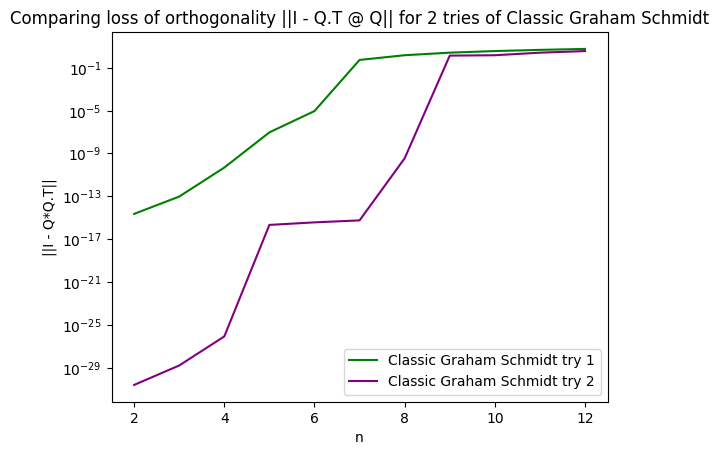

I_minus_Q_Qt_classic_1: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_classic_2: [2.789044477473679e-31, 1.7989029143884645e-29, 9.140263114127041e-27, 2.220446049250321e-16, 3.845925373438756e-16, 5.874754449697598e-16, 3.541775006495208e-10, 1.3018166018781856, 1.4142135621307204, 2.4461087783381315, 3.4641012612115065]


In [73]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_1 = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic_1 = classical_gram_schmidt(H)[0]
    list_of_Q_classic_1.append(Q_gram_classic_1)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_1]

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_2 = []
for n in n_range:
    Qt_Q = list_of_Q_classic_1[n-2].T @ list_of_Q_classic_1[n-2]
    Q_gram_classic_2 = classical_gram_schmidt(Qt_Q)[0]
    list_of_Q_classic_2.append(Q_gram_classic_2)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_2]

plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| for 2 tries of Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_classic_1, c = 'green', label = 'Classic Graham Schmidt try 1')
plt.plot(n_range,I_minus_Q_Qt_classic_2, c = 'purple', label = 'Classic Graham Schmidt try 2')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic_1:', I_minus_Q_Qt_classic_1)
print('I_minus_Q_Qt_classic_2:', I_minus_Q_Qt_classic_2)

We can see for low values of n, applying the gram Schmidt procedure again on the product of tha matrices Q.T @ Q (where Q is the the output of the first Gram Schmidt output series) results in lower Orthogonality loss. This reduction in orthogonality loss reduces as n increases, so applying the procedure twice loses its benefit (for the given ranges of n and inputs). 

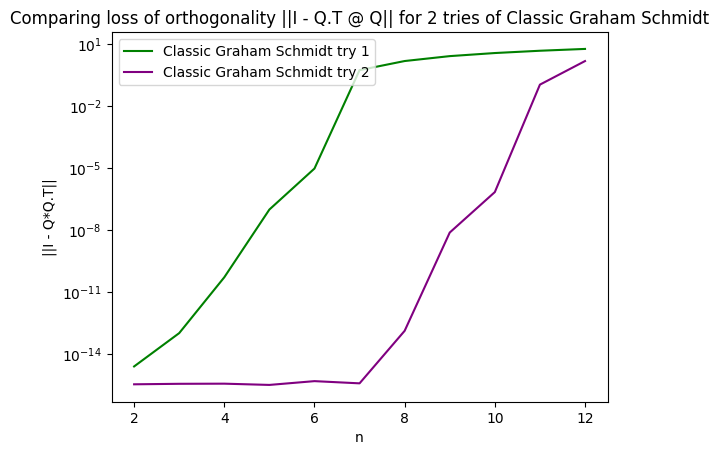

I_minus_Q_Qt_classic_1: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_classic_2: [3.236828524569469e-16, 3.4219371797089426e-16, 3.472221400179444e-16, 3.021408270392384e-16, 4.60796892750692e-16, 3.6018808403219723e-16, 1.2540090424564655e-13, 7.145380658622118e-09, 6.480295313376455e-07, 0.10251662911201843, 1.4152936653156225]


In [74]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_1 = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic_1 = classical_gram_schmidt(H)[0]
    list_of_Q_classic_1.append(Q_gram_classic_1)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_1 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_1]

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic_2 = []
for n in n_range:
    Q_classic_GS_applied_once = list_of_Q_classic_1[n-2]
    Q_gram_classic_2 = classical_gram_schmidt(Q_classic_GS_applied_once)[0]
    list_of_Q_classic_2.append(Q_gram_classic_2)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic_2 = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic_2]

plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| for 2 tries of Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_classic_1, c = 'green', label = 'Classic Graham Schmidt try 1')
plt.plot(n_range,I_minus_Q_Qt_classic_2, c = 'purple', label = 'Classic Graham Schmidt try 2')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic_1:', I_minus_Q_Qt_classic_1)
print('I_minus_Q_Qt_classic_2:', I_minus_Q_Qt_classic_2)

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [75]:
# def householder_qr(A):
#     """"Householder QR decomposition. Returns Q and R as a tuple. Method used specified in Heath Scientific Computing: An introductory survey: 5th edition p.124"""
#     A = A.copy()
#     m, n = A.shape
#     Q = np.eye(m)
#     R = A.copy()
#     minimum = min(m-1,n)

#     for k in range(minimum):
#         alpha_k = -np.sign(A[k,k]) * np.linalg.norm(A[k:,k])
#         e_k = np.zeros(m-k)
#         e_k[0] = alpha_k
#         v_k = A[k:,k] - e_k
#         beta_k = v_k.T @ v_k

#         if beta_k == 0:
#             continue

#         for j in range(k,n):
#             if j >= k:
#                 gamma_j = v_k.T @ A[k:,j]
#                 A[k:,j] = A[k:,j] - (2 * gamma_j/beta_k) * v_k
#         for j in range(m):     
#             gamma_j = v_k.T @ Q[k:,j]
#             Q[k:,j] = Q[k:,j] - (2 * gamma_j/beta_k) * v_k
#     R = A
#     return Q.T, R

In [76]:
def householder_qr(A):
    """
    Perform the Householder QR decomposition of a matrix.

    The Householder QR decomposition is a method of decomposing a matrix A into a product 
    of an orthogonal matrix Q and an upper triangular matrix R. This implementation follows 
    the method specified in "Heath Scientific Computing: An Introductory Survey, 5th Edition, p.124".

    Parameters:
    A (ndarray): The input matrix to decompose. Must be a 2D NumPy array.

    Returns:
    tuple: A tuple (Q, R) where Q is an orthogonal matrix and R is an upper triangular matrix such that A = QR.

    Note:
    - The function creates a copy of A to avoid modifying the original matrix.
    - It uses the Householder transformations for the decomposition process.
    """
    # Create a copy of A to avoid modifying the input matrix
    A = A.copy()
    m, n = A.shape
    # Initialize Q as an identity matrix of the same size as A
    Q = np.eye(m)
    # Copy A into R for in-place manipulation
    R = A.copy()
    # Determine the number of steps based on the dimensions of A
    minimum = min(m-1, n)

    # Perform the Householder transformations
    for k in range(minimum):
        # Compute the alpha parameter for the Householder vector
        alpha_k = -np.sign(A[k, k]) * np.linalg.norm(A[k:, k])
        e_k = np.zeros(m-k)
        e_k[0] = alpha_k
        v_k = A[k:, k] - e_k
        beta_k = v_k.T @ v_k

        # Skip the transformation if beta_k is zero
        if beta_k == 0:
            continue

        # Update columns of A and Q using the Householder vector v_k
        for j in range(k, n):
            gamma_j = v_k.T @ A[k:, j]
            A[k:, j] = A[k:, j] - (2 * gamma_j / beta_k) * v_k
        for j in range(m):
            gamma_j = v_k.T @ Q[k:, j]
            Q[k:, j] = Q[k:, j] - (2 * gamma_j / beta_k) * v_k

    # Update R to the final transformed matrix A
    R = A
    # Return the transpose of Q and R
    return Q.T, R

In [77]:
H = make_hilbert_matrix(3)

In [78]:

householder_qr(H)[1]

array([[-1.16666667, -0.64285714, -0.45      ],
       [ 0.        , -0.10171433, -0.10533703],
       [ 0.        ,  0.        ,  0.00390137]])

In [79]:
modified_gram_schmidt(H)[1]

array([[1.16666667, 0.64285714, 0.45      ],
       [0.        , 0.10171433, 0.10533703],
       [0.        , 0.        , 0.00390137]])

## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


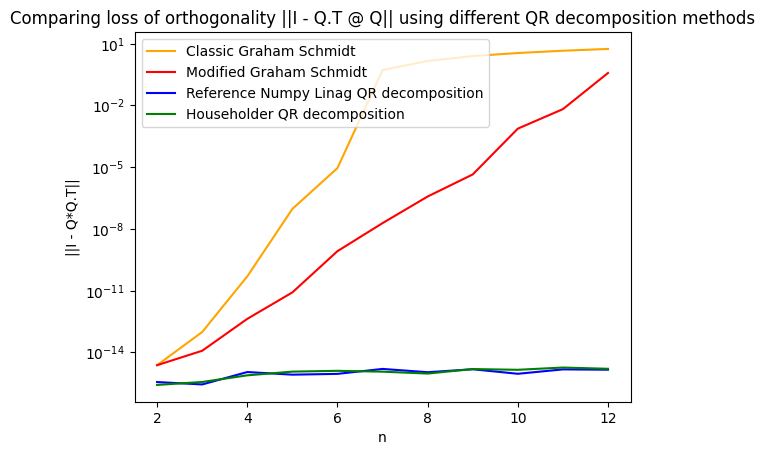

I_minus_Q_Qt_classic: [2.368186647638997e-15, 9.708394103379396e-14, 4.8804695700183416e-11, 9.252280064079063e-08, 8.924801727218752e-06, 0.5160513219171006, 1.4208674448387233, 2.4550183558908283, 3.462419953032272, 4.470314142987518, 5.476471673352437]
I_minus_Q_Qt_modified: [2.368186647638997e-15, 1.19130603637318e-14, 4.220164732810544e-13, 8.129448492641487e-12, 8.213337219931363e-10, 1.8883321207316407e-08, 3.704655786928431e-07, 4.3746673643116425e-06, 0.0007342783123353194, 0.0065219743395960785, 0.37164390391767127]
I_minus_Q_Qt_reference: [3.597533769998862e-16, 2.7476618026966064e-16, 1.1004656964352382e-15, 8.200821523359857e-16, 8.961656023355713e-16, 1.559947614138878e-15, 1.0791513831031437e-15, 1.5011704008320562e-15, 9.04841642562989e-16, 1.4798365649911251e-15, 1.4289562855533472e-15]


In [80]:
n_range = range(2,13)

# creating a list of Q matrices with our classic Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_classic = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_classic = classical_gram_schmidt(H)[0]
    list_of_Q_classic.append(Q_gram_classic)

# Computing ||I - Q.T @ Q|| for Gram Schmidt classic
I_minus_Q_Qt_classic = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_classic]


# creating a list of Q matrices with our modified Gram Schmidt orthogonalization based on Hilberts matrices with increasing n
list_of_Q_modified = []
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_modified = modified_gram_schmidt(H)[0]
    list_of_Q_modified.append(Q_gram_modified)

# Computing ||I - Q.T @ Q|| for Gram Schmidt modified
I_minus_Q_Qt_modified = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_modified]

# creating a list of Q matrices with numpy reference QR decomposition based on Hilberts matrices with increasing n
list_of_Q_reference = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_gram_reference = np.linalg.qr(H)[0]
    list_of_Q_reference.append(Q_gram_reference)

# Computing ||I - Q.T @ Q|| for reference numpy implementation
I_minus_Q_Qt_reference = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_Q_reference]


list_of_q_householder = [] 
for n in n_range:
    H = make_hilbert_matrix(n)
    Q_householder = householder_qr(H)[0]
    list_of_q_householder.append(Q_householder)

# Computing ||I - Q.T @ Q|| for reference numpy implementation
I_minus_Q_Qt_householder = [np.linalg.norm(np.eye(Q.shape[0])-Q.T @ Q) for Q in list_of_q_householder]

# Plotting results
plt.title('Comparing loss of orthogonality ||I - Q.T @ Q|| using different QR decomposition methods')
plt.plot(n_range,I_minus_Q_Qt_classic, c = 'orange', label = 'Classic Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_modified, c = 'red', label = 'Modified Graham Schmidt')
plt.plot(n_range,I_minus_Q_Qt_reference, c = 'blue', label = 'Reference Numpy Linag QR decomposition')
plt.plot(n_range,I_minus_Q_Qt_householder, c = 'green', label = 'Householder QR decomposition')
plt.ylabel('||I - Q*Q.T||')
plt.xlabel('n')
plt.yscale('log')
plt.legend()
plt.show()

print('I_minus_Q_Qt_classic:',I_minus_Q_Qt_classic)
print('I_minus_Q_Qt_modified:', I_minus_Q_Qt_modified)
print('I_minus_Q_Qt_reference:', I_minus_Q_Qt_reference)




**Answer**
All of our algorithms work in obtaining Q and R matrices that when multiplied produce a similar matrix to the original and for an m×n matrix both the Householder and Gram-Schmidt cost $m\cdot n^2−n^2/3$ floating point additions and multiplications [1]. This behavior, while expected, is not enough for exhausting the comparisson between algorithms as it is important to consider whether the algorithms also produce orthogonality (whether $Q'* Q$ is close to the identity or not) [2].

In this regard, and as can be seen in our figure, there are huge differences between the different methods tested. The loss of orthogonality as n increases for the interval considered is greater than linear for the Gram Schmidt, close to linear for the modified Gram Schmidt method and basically stable for the Householder and reference method. Furthermore, these differences are many orders of magnitude apart, suggesting that for bigger values of n, the choice of the algorithm can have a great effect. 

These results are also consistent with the sources consulted, for respect to orthogonality is usually obtained with a higher computational costs [3], which can be easily confirmed by looking at the complexity of our different implementations. Heath, for instance, indicates that despite risking being heavy-handed when selectivity is needed while introducing zeros, the Householder method is nevertheless good for efficiency [3]. On the other hand the Classic Gram-Schmidt method usually has very poor orthogonality and for the Modified Gram-Schmidt method, it will depends upon the conditions of the original matrix, actually failing completely when the matrix is singular [2]. One last key insight from our results is that our Householder implementation has a loss of ortogonailty close to the one provided by the reference, which further supports the argument that it should be the preferred choice in this regard.

[1] G. W. Stewart - Matrix Algorithms: Volume 1: Basic Decompositions
[2] Cleve Moler - Compare Gram-Schmidt and Householder Orthogonalization Algorithms (https://blogs.mathworks.com/cleve/2016/07/25/compare-gram-schmidt-and-householder-orthogonalization-algorithms/)
[3] Michael T. Heath - Scientific Computing An Introductory Survey (p. 126)
